In [1]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

lang = 'english'

In [2]:
metacritic = pd.read_csv("../../../Data/Final Dataset /Metacritic/Metacritic_Final.csv")

print(metacritic.head())

                 Game Title Console Commenter Name Reviewer Type Comment  \
0           synthetic lover     NaN            NaN        Critic     NaN   
1           synthetic lover     NaN            NaN          User     NaN   
2                 railbreak     NaN            NaN        Critic     NaN   
3                 railbreak     NaN            NaN          User     NaN   
4  mortal kombat 1 quan chi     NaN            NaN        Critic     NaN   

  Date Commented Score Number  Release Date  \
0            NaN          tbd  Dec 22, 2023   
1            NaN          NaN  Dec 22, 2023   
2            NaN          tbd  Dec 22, 2023   
3            NaN          NaN  Dec 22, 2023   
4            NaN          tbd           NaN   

                                         Description  \
0  In the year 2066, biologically engineered huma...   
1  In the year 2066, biologically engineered huma...   
2  Power through hordes of zombies, '90s arcade s...   
3  Power through hordes of zombies, 

In [3]:
print(metacritic.shape)
print(metacritic.columns)

(4803, 10)
Index(['Game Title', 'Console', 'Commenter Name', 'Reviewer Type', 'Comment',
       'Date Commented', 'Score Number', 'Release Date', 'Description',
       'Game Link'],
      dtype='object')


In [4]:
metacritic_comments = metacritic['Comment']
metacritic_comments = metacritic_comments.str.lower()
metacritic_comments = metacritic_comments.str.cat(sep=' ')

print(metacritic_comments[:100])

the gripping science-fiction narrative in three minutes to eight features an ingenious use of random


In [5]:
regex = re.compile('[%s]' % re.escape(string.punctuation))
metacritic_comments = regex.sub('', metacritic_comments)

print(metacritic_comments[:100])

the gripping sciencefiction narrative in three minutes to eight features an ingenious use of random 


In [6]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]{2,}')

In [7]:
tokenized_metacritic_comments = tokenizer.tokenize(metacritic_comments)

print(tokenized_metacritic_comments[:100])
print(len(tokenized_metacritic_comments))

['the', 'gripping', 'sciencefiction', 'narrative', 'in', 'three', 'minutes', 'to', 'eight', 'features', 'an', 'ingenious', 'use', 'of', 'random', 'elements', 'that', 'combined', 'with', 'wellexecuted', 'pixel', 'art', 'graphics', 'and', 'accomplished', 'voice', 'acting', 'ensure', 'that', 'each', 'experience', 'is', 'unique', 'it', 'unfortunate', 'that', 'it', 'took', 'over', 'twenty', 'years', 'for', 'the', 'west', 'to', 'experience', 'rhapsody', 'ii', 'properly', 'as', 'the', 'game', 'is', 'incredibly', 'fun', 'amusing', 'and', 'full', 'of', 'both', 'heart', 'and', 'charm', 'the', 'characters', 'are', 'just', 'as', 'hilarious', 'as', 'they', 'are', 'heartfelt', 'the', 'musical', 'numbers', 'make', 'the', 'game', 'stand', 'out', 'amongst', 'its', 'peers', 'and', 'the', 'game', 'is', 'wildly', 'creative', 'in', 'every', 'aspect', 'rhapsody', 'ii', 'short', 'length', 'ensures', 'it', 'breezy']
127076


In [8]:
lemmatizer = WordNetLemmatizer()

In [9]:
lemmatized_metacritic_comments = [lemmatizer.lemmatize(token) for token in tokenized_metacritic_comments]

print(lemmatized_metacritic_comments[:100])
print(len(lemmatized_metacritic_comments))

['the', 'gripping', 'sciencefiction', 'narrative', 'in', 'three', 'minute', 'to', 'eight', 'feature', 'an', 'ingenious', 'use', 'of', 'random', 'element', 'that', 'combined', 'with', 'wellexecuted', 'pixel', 'art', 'graphic', 'and', 'accomplished', 'voice', 'acting', 'ensure', 'that', 'each', 'experience', 'is', 'unique', 'it', 'unfortunate', 'that', 'it', 'took', 'over', 'twenty', 'year', 'for', 'the', 'west', 'to', 'experience', 'rhapsody', 'ii', 'properly', 'a', 'the', 'game', 'is', 'incredibly', 'fun', 'amusing', 'and', 'full', 'of', 'both', 'heart', 'and', 'charm', 'the', 'character', 'are', 'just', 'a', 'hilarious', 'a', 'they', 'are', 'heartfelt', 'the', 'musical', 'number', 'make', 'the', 'game', 'stand', 'out', 'amongst', 'it', 'peer', 'and', 'the', 'game', 'is', 'wildly', 'creative', 'in', 'every', 'aspect', 'rhapsody', 'ii', 'short', 'length', 'ensures', 'it', 'breezy']
127076


In [10]:
stopwords = set(stopwords.words(lang))

In [11]:
cleaned_metacritic_comments = [token for token in lemmatized_metacritic_comments if token not in stopwords]

print(cleaned_metacritic_comments[:100])
print(len(cleaned_metacritic_comments))

['gripping', 'sciencefiction', 'narrative', 'three', 'minute', 'eight', 'feature', 'ingenious', 'use', 'random', 'element', 'combined', 'wellexecuted', 'pixel', 'art', 'graphic', 'accomplished', 'voice', 'acting', 'ensure', 'experience', 'unique', 'unfortunate', 'took', 'twenty', 'year', 'west', 'experience', 'rhapsody', 'ii', 'properly', 'game', 'incredibly', 'fun', 'amusing', 'full', 'heart', 'charm', 'character', 'hilarious', 'heartfelt', 'musical', 'number', 'make', 'game', 'stand', 'amongst', 'peer', 'game', 'wildly', 'creative', 'every', 'aspect', 'rhapsody', 'ii', 'short', 'length', 'ensures', 'breezy', 'experience', 'perfect', 'palette', 'cleanser', 'amidst', 'sea', 'rpgs', 'set', 'miserable', 'world', 'rhapsody', 'ii', 'vastly', 'improved', 'sequel', 'front', 'ha', 'minor', 'blemish', 'easy', 'recommend', 'anyone', 'looking', 'unique', 'experience', 'bed', 'made', 'great', 'game', 'kept', 'returning', 'loved', 'narrative', 'experience', 'human', 'element', 'story', 'though', '

In [12]:
freq_dist = FreqDist(cleaned_metacritic_comments)

In [13]:
freq_dist.most_common(15)

[('game', 2506),
 ('one', 538),
 ('like', 491),
 ('fun', 444),
 ('time', 421),
 ('story', 410),
 ('great', 391),
 ('ha', 380),
 ('play', 380),
 ('good', 368),
 ('gameplay', 364),
 ('experience', 359),
 ('wa', 346),
 ('make', 345),
 ('new', 329)]

In [14]:
bigrams = ngrams(cleaned_metacritic_comments, 2)

print(list(bigrams)[:10])

[('gripping', 'sciencefiction'), ('sciencefiction', 'narrative'), ('narrative', 'three'), ('three', 'minute'), ('minute', 'eight'), ('eight', 'feature'), ('feature', 'ingenious'), ('ingenious', 'use'), ('use', 'random'), ('random', 'element')]


In [15]:
bigrams_list = ngrams(cleaned_metacritic_comments, 2)
bigram_count = Counter(bigrams_list)

In [16]:
print(bigram_count.most_common(15))

[(('one', 'best'), 91), (('feel', 'like'), 79), (('game', 'ha'), 50), (('great', 'game'), 48), (('best', 'game'), 46), (('final', 'fantasy'), 44), (('lot', 'fun'), 43), (('game', 'like'), 43), (('good', 'game'), 40), (('video', 'game'), 38), (('game', 'wa'), 38), (('visual', 'novel'), 36), (('fun', 'game'), 35), (('art', 'style'), 34), (('game', 'play'), 32)]


In [17]:
bigrams, counts = zip(*bigram_count.most_common(20))

In [18]:
bigram_labels = [' '.join(bigram) for bigram in bigrams]

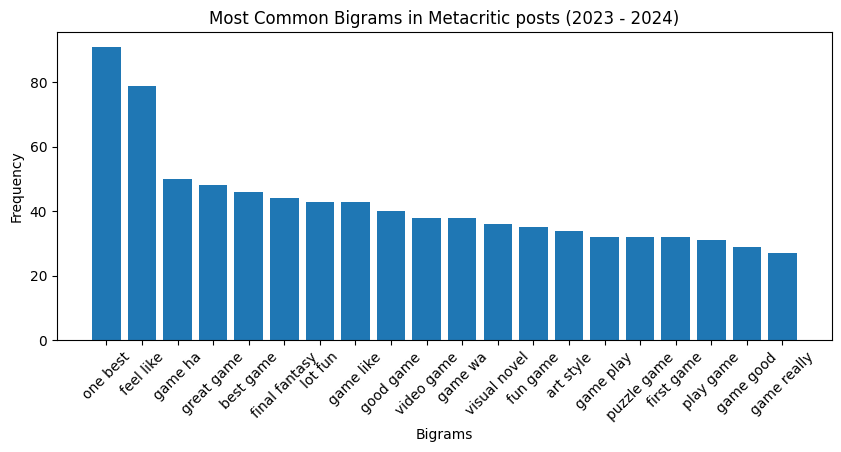

In [19]:
plt.figure(figsize=(10, 4))
plt.bar(bigram_labels, counts)
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Most Common Bigrams in Metacritic posts (2023 - 2024)')
plt.xticks(rotation=45)
plt.show()